# **DeepFace - Age, Gender, Expression, Headpose and Recognition**

---


In this lesson, we use the **DeepFace API for Age, Gender, Expression Facial and Recognition. We even use the headpose library to obtain head direction/tilt**. DeepFace is an easy to use python module that provides access to several Facial Detection and Recognition models. It's very simple to use to let's dive in.

1. Install the necessary modules and download our files
2. Demonstrate facial landmarks
3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace


**NOTE** Change to High-RAM setting.


## **1. Install the necessary modules and download our files**

In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 906.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=0e27bb71501435253de1d2eaa426e7a42c9ce940fb4655056a4c40b015a8d458
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


#### **Define our imshow function**

In [2]:
# Some imports and our image viewing function
import dlib
import tarfile
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [3]:
# Download facial landmarks
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/shape_predictor_68_face_landmarks.dat

--2023-12-19 04:04:32--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/shape_predictor_68_face_landmarks.dat
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.244.142, 52.95.144.6, 52.95.143.34, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|3.5.244.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/x-www-form-urlencoded]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M  15.9MB/s    in 18s     

2023-12-19 04:04:51 (5.35 MB/s) - ‘shape_predictor_68_face_landmarks.dat’ saved [99693937/99693937]



In [4]:
# Download our test images and a test pic
!gdown --id 1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
!unzip -q face_recognition.zip
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
To: /content/face_recognition.zip
100% 4.84M/4.84M [00:00<00:00, 21.3MB/s]
--2023-12-19 04:05:02--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/me.jpg [following]
--2023-12-19 04:05:02--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/me.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githu

## **2. Demonstrate facial landmarks**

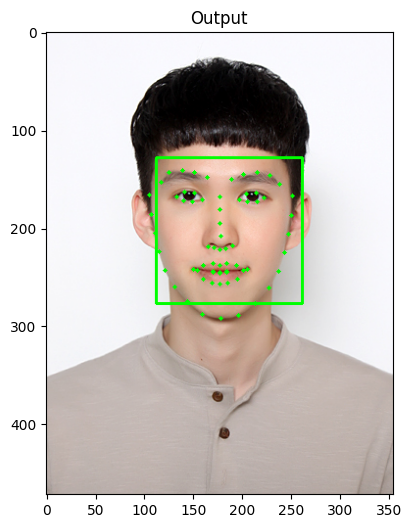

In [17]:
from imutils import face_utils

p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

image = cv2.imread('al.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get faces
rects = detector(gray, 0)

# For each detected face, find the landmark.
for (i, rect) in enumerate(rects):
    # Make the prediction and transfom it to numpy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Draw on our image, all the finded cordinate points (x,y)
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Show the image
imshow("Output", image)

## **3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace**

**Download our models**

In [6]:
!gdown --id 1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
!gdown --id 1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
!gdown --id 1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
!gdown --id 1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI

!mv facial_expression_model_weights.zip /root/.deepface/weights/facial_expression_model_weights.zip
!mv age_model_weights.h5 /root/.deepface/weights/age_model_weights.h5
!mv gender_model_weights.h5 /root/.deepface/weights/gender_model_weights.h5
!mv race_model_single_batch.zip /root/.deepface/weights/race_model_single_batch.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
To: /content/facial_expression_model_weights.zip
100% 5.54M/5.54M [00:00<00:00, 15.4MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
To: /content/age_model_weights.h5
100% 539M/539M [00:13<00:00, 40.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
Fr

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]


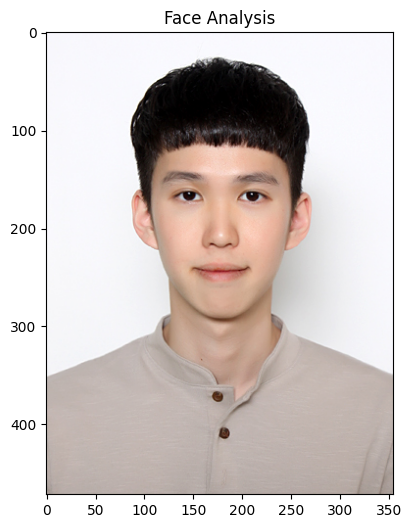

[   {   'age': 22,
        'dominant_emotion': 'neutral',
        'dominant_gender': 'Man',
        'dominant_race': 'asian',
        'emotion': {   'angry': 3.113988600014961,
                       'disgust': 1.0080189728674044e-05,
                       'fear': 0.5582525727601393,
                       'happy': 13.278109626657345,
                       'neutral': 78.35572828982642,
                       'sad': 4.585032438339736,
                       'surprise': 0.10887971796868551},
        'face_confidence': 9.239295052771922,
        'gender': {'Man': 99.85756874084473, 'Woman': 0.1424310146830976},
        'race': {   'asian': 99.97934699304736,
                    'black': 1.9287955598214544e-06,
                    'indian': 0.0005354824041326086,
                    'latino hispanic': 0.008481624252723618,
                    'middle eastern': 1.0203513261426552e-05,
                    'white': 0.011622408125392869},
        'region': {'h': 204, 'w': 204, 'x': 78, 'y': 

In [21]:
from deepface import DeepFace
import pprint

img_path = "al.jpg"
image = cv2.imread(img_path)

obj = DeepFace.analyze(img_path = img_path,
                       actions = ['age', 'gender', 'race', 'emotion'])
imshow("Face Analysis", image)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

#### **Create a simple function to display our results on the image**

In [15]:
import cv2

def drawFace(img_path, obj):
  image = cv2.imread(img_path)
  x = obj[0]['region']['x']
  y = obj[0]['region']['y']
  h = obj[0]['region']['h']
  w = obj[0]['region']['w']
  age = obj[0]['age']
  gender = obj[0]['gender']
  gender = 'F' if gender == 'Woman' else 'M'
  dominant_emotion = obj[0]['dominant_emotion']
  dominant_race = obj[0]['dominant_race']
  dominant_emotion = obj[0]['dominant_emotion']
  description = f'{age}{gender} - {dominant_emotion}'
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  cv2.putText(image, description, (x,y-10) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  cv2.putText(image, dominant_race, (x,y+h+30) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  imshow("Face Analysis", image)

#### **Test on another image**

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.25it/s]


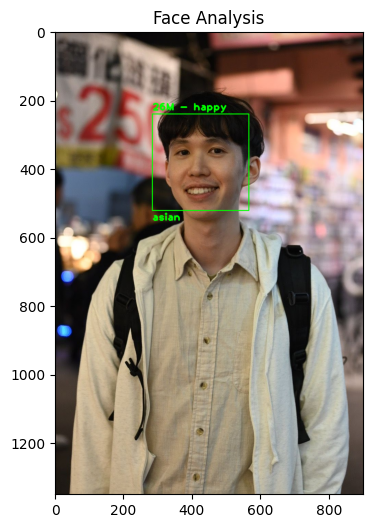

[   {   'age': 26,
        'dominant_emotion': 'happy',
        'dominant_gender': 'Man',
        'dominant_race': 'asian',
        'emotion': {   'angry': 0.0001996507091176843,
                       'disgust': 2.1755320626603865e-09,
                       'fear': 5.875696292732086e-05,
                       'happy': 99.85342024009469,
                       'neutral': 0.14440076750079006,
                       'sad': 0.0014678304909389026,
                       'surprise': 0.00045897400937850883},
        'face_confidence': 5.704065172409173,
        'gender': {'Man': 99.03490543365479, 'Woman': 0.9650914929807186},
        'race': {   'asian': 99.86608028411865,
                    'black': 0.00017944341834663646,
                    'indian': 0.015829651965759695,
                    'latino hispanic': 0.1036726520396769,
                    'middle eastern': 2.4213335336753516e-05,
                    'white': 0.014215274131856859},
        'region': {'h': 282, 'w': 282, 'x':

In [20]:
from deepface import DeepFace
import pprint

img_path = "alb.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
drawFace(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)